# Linear regression

### We are going to find out how to predict the profits in a chain of restaurants in different towns in America by the size of the population in each town

#### In the dataset we will use the population size and the profits have both deen divided by 10000.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### We have a text file . Use pd.read_table.

In [29]:
# There is no header.
df = pd.read_table('profit.txt', header = None)
print(df.head())
print(df.shape)

               0
0  6.1101,17.592
1  5.5277,9.1302
2  8.5186,13.662
3  7.0032,11.854
4  5.8598,6.8233
(97, 1)


#### Split the strings in to two columns using str.split with argument expand=True. Rename the columns as {0:'population',1:'profit'}

In [30]:
df.iloc[0].str.split(',',expand=True)

,0,1
0,6.1101,17.592


In [31]:
df = df.iloc[:,0].str.split(',',expand=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       97 non-null     object
 1   1       97 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB


,0,1
0,6.1101,17.592
1,5.5277,9.1302
2,8.5186,13.662
3,7.0032,11.854
4,5.8598,6.8233


In [36]:
df = df.rename(columns = {0:'population' , 1:'profit'})
df

,population,profit
0,6.1101,17.592
1,5.5277,9.1302
2,8.5186,13.662
3,7.0032,11.854
4,5.8598,6.8233
...,...,...
92,5.8707,7.2029
93,5.3054,1.9869
94,8.2934,0.14454
95,13.394,9.0551


#### We need numerical data not strings! Make into floats

In [40]:
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


#### Population will be the independent variable (save as array X)  and profit will be dependent variable (save as vector y)

In [41]:
#df.values will convert dataframe to numpy object
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [43]:
print(X)

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

#### Split into train and test sets (70:30)

In [1]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=7)


NameError: name 'X' is not defined

#### Make histograms for each of X_train and y_train

In [2]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(X_train)
ax1.set_xlabel('population')
ax2.hist(y_train)
ax2.set_xlabel('profit')

NameError: name 'plt' is not defined

#### Make scatter plot for train set

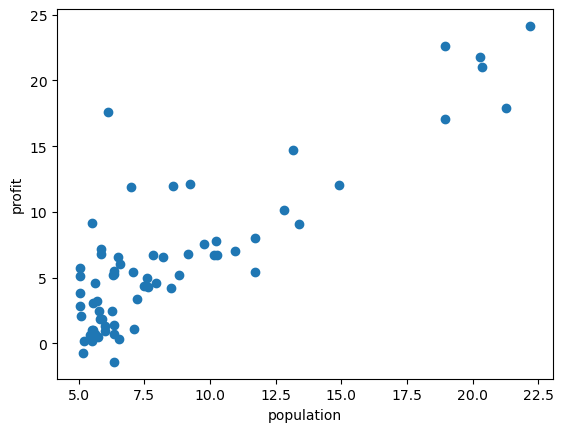

In [49]:
plt.scatter(X_train, y_train)
plt.xlabel('population')
plt.ylabel('profit')
plt.show()

#### Fit the linear regressor on the train set

In [52]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [56]:
print(lreg.coef_,lreg.intercept_)

[1.14861781] -3.438741714890651


#### Use lreg.predict on the train set to add regression line to scatter plot

Text(0, 0.5, 'profit')

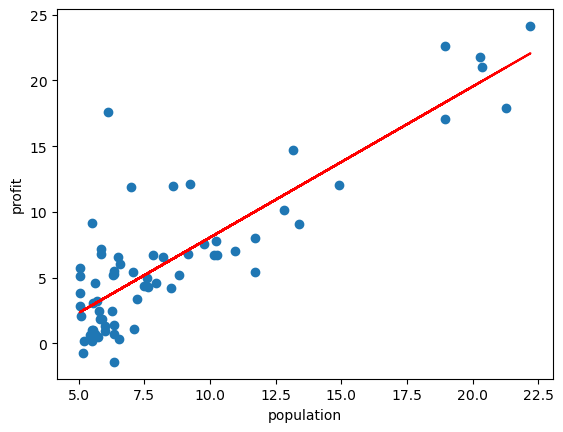

In [58]:
y_train_pred = lreg.predict(X_train)
plt.plot(X_train, y_train_pred, color = 'r')
plt.scatter(X_train, y_train)
plt.xlabel('population')
plt.ylabel('profit')


#### Predict profits on test set. Make new plot for test data showing the test data, predictions and  regression line

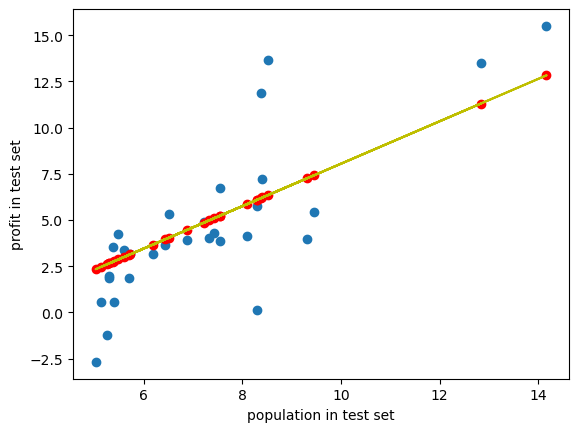

In [62]:
y_test_pred = lreg.predict(X_test)
plt.scatter(X_test, y_test)
plt.xlabel('population in test set')
plt.ylabel('profit in test set')
plt.scatter(X_test,y_test_pred, color='r')
plt.plot(X_test,y_test_pred, color='y')

#### plot residuals for train and test set predictions (predictions on x axis and residuals on y axis)

Text(0, 0.5, 'residuals')

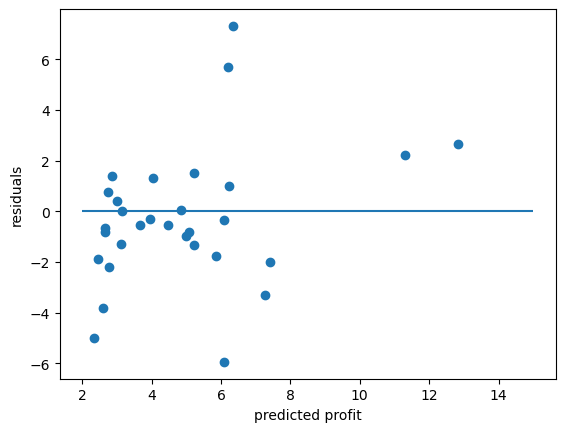

In [64]:
resid = y_test - y_test_pred
plt.scatter(y_test_pred, resid)
plt.hlines(y=0, xmin=2,xmax=15)
plt.xlabel('predicted profit')
plt.ylabel('residuals')

#### Calculate mse,rmse , mae and R^2

In [71]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
rmse = mse**0.5
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(mse, rmse,mae,r2)

7.1339274016837795 2.6709412950650524 1.9276677341323374 0.5875056517670413


#### Plot histogram with density plot of the test set residuals

<AxesSubplot:ylabel='Count'>

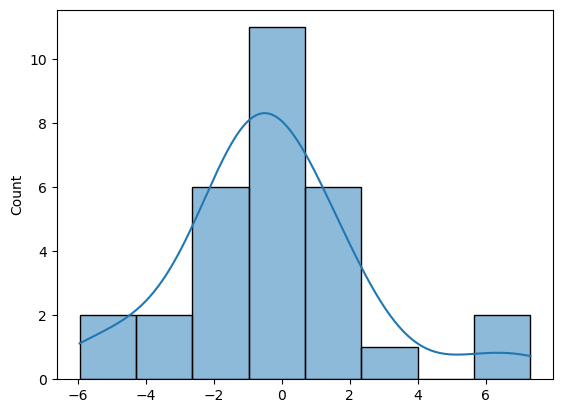

In [70]:
sns.histplot(resid , kde=True)